
## SARS-COV-2 subtypes

### Vraag 1.

In het bestand `sars-cov-2-reports.json` staan 10.000 reports van sars-cov-2 isolaten. Selecteer alle subtypes die meer dan 100 keer voorkomen in deze dataset, en plot voor de gevonden subtypes de hoeveelheid samples per subtype in een barplot. Het subtype kan je vinden in het veld `pangolin_classification`.

*bron: NCBI. Gedownload met het commando `datasets summary virus genome taxon sars-cov-2 --limit 10000`*



In [19]:
import pandas as pd
import json

with open("sars-cov-2-reports.json") as fh:
    sarscov2 = json.load(fh)

sarscov2[0]

{'accession': 'BS001684.1',
 'completeness': 'COMPLETE',
 'host': {'lineage': [{'name': 'cellular organisms', 'tax_id': 131567},
   {'name': 'Eukaryota', 'tax_id': 2759},
   {'name': 'Opisthokonta', 'tax_id': 33154},
   {'name': 'Metazoa', 'tax_id': 33208},
   {'name': 'Eumetazoa', 'tax_id': 6072},
   {'name': 'Bilateria', 'tax_id': 33213},
   {'name': 'Deuterostomia', 'tax_id': 33511},
   {'name': 'Chordata', 'tax_id': 7711},
   {'name': 'Craniata', 'tax_id': 89593},
   {'name': 'Vertebrata', 'tax_id': 7742},
   {'name': 'Gnathostomata', 'tax_id': 7776},
   {'name': 'Teleostomi', 'tax_id': 117570},
   {'name': 'Euteleostomi', 'tax_id': 117571},
   {'name': 'Sarcopterygii', 'tax_id': 8287},
   {'name': 'Dipnotetrapodomorpha', 'tax_id': 1338369},
   {'name': 'Tetrapoda', 'tax_id': 32523},
   {'name': 'Amniota', 'tax_id': 32524},
   {'name': 'Mammalia', 'tax_id': 40674},
   {'name': 'Theria', 'tax_id': 32525},
   {'name': 'Eutheria', 'tax_id': 9347},
   {'name': 'Boreoeutheria', 'tax_id'

In [20]:
sarscov2 = pd.json_normalize(sarscov2)
sarscov2.head(1)

,accession,completeness,is_annotated,length,protein_count,release_date,source_database,update_date,host.lineage,host.organism_name,...,submitter.affiliation,submitter.country,submitter.names,virus.lineage,virus.organism_name,virus.pangolin_classification,virus.tax_id,bioprojects,biosample,sra_accessions
0,BS001684.1,COMPLETE,True,29800,12.0,2022-01-22T00:00:00Z,GenBank,2022-01-22T00:00:00Z,"[{'name': 'cellular organisms', 'tax_id': 1315...",Homo sapiens,...,"Mishima, Shizuoka 411-8540",Japan,"[Nagaoka,H., Arita,Y., Ishigami,K., Mori,H., T...","[{'name': 'Viruses', 'tax_id': 10239}, {'name'...",Severe acute respiratory syndrome coronavirus 2,AY.29,2697049,NaN,NaN,NaN


<Axes: xlabel='virus.pangolin_classification'>

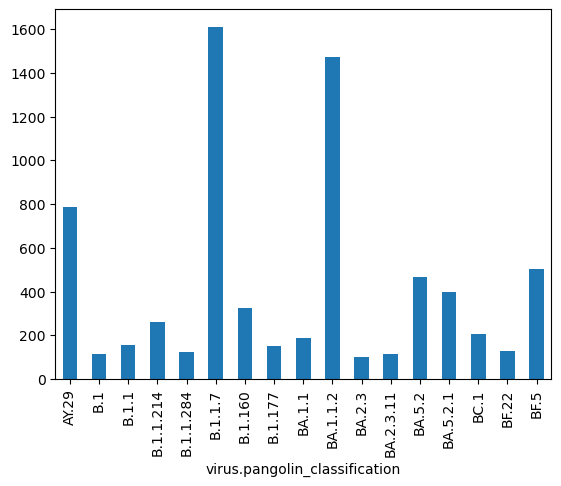

In [21]:
sarscov2type = sarscov2.groupby("virus.pangolin_classification").size()
sarscov2type[sarscov2type > 100].plot(kind='bar')

## Pokedex

Wat zou een programmeeropdracht zijn zonder Pokémon? In de folder met opdrachten staat het bestand `pokedex.json` ([bron](https://github.com/Purukitto/pokemon-data.json/blob/master/pokedex.json)). Gebruik deze voor het maken van de volgende vragen.

### Vraag 1.

Selecteer een random Pokémon uit `pokedex.json` en toon daarvan de `hires` image.

In [22]:
# Deze import heb je nodig om een plaatje te kunnen weergeven vanuit een URL
from IPython.display import Image

from random import sample
import matplotlib.pyplot as plt

with open("pokedex.json", encoding='utf-8') as fh:
    pokedex = json.load(fh)

random_pokemon = sample(pokedex, 1)[0]
# random_pokemon
Image(url=random_pokemon["image"]["hires"])


### Vraag 2.

Je wilt graag weten bij welk Level de meeste Pokémon evolueren. Maak een bar chart met daarin het aantal evoluties per Level. Toon alleen de levels waarin minimaal 5 Pokémon evolueren. Sorteer je bar chart van meeste evoluties -> minste evoluties.

<Axes: >

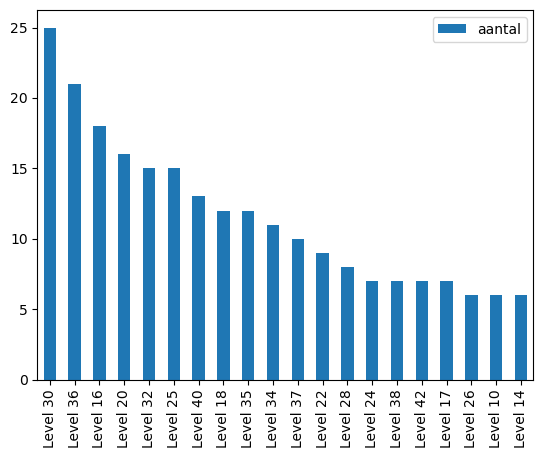

In [23]:
with open("pokedex.json", encoding='utf-8') as fh:
    pokedex = json.load(fh)

jumps = {}

for pok in pokedex:
    evolist = pok['evolution'].get("next", None)
    if evolist:
        level = evolist[0][1]
        try:
            jumps[level] += 1
        except:
            jumps[level] = 1

evolution_stages = pd.DataFrame.from_dict(data=jumps, orient='index',columns=["aantal"])
# evolution_stages.head(5)
evolution_stages.query('aantal > 5 & index.str.startswith("Level")').sort_values(by="aantal", ascending=False).plot(kind="bar")
